## t-Distributed Stochastic Neighbour Embedding (t-SNE)

t-SNE is a tool to visualize high-dimensional data. We'll use t-SNE to analyse the clustering tendency of CSI data among different activity classes and gain valuable insights
from the manifold embeddings.

---

### CSI Data - 3 Activies, Same day, Same static environment

t-SNE converged in 3849 iterations


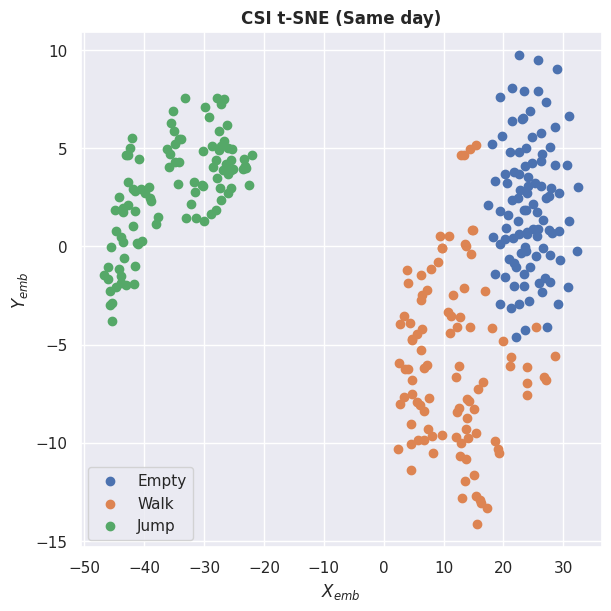

In [3]:
import scipy.io
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set_theme()

# Load dataset
mat = scipy.io.loadmat("../dataset/rCSI-100-same-env")
X = mat["csi"].T
nsamples = mat["nsamples"].flatten()
dim = mat["dim"].flatten()
classnames = list(map(lambda s: s.strip().title(), mat["classnames"]))
y = []
for i in range(len(classnames)):
    y += [i] * nsamples[i]

Xstd = StandardScaler().fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=20,
    n_iter=5000,
    n_iter_without_progress=300,
    random_state=3,
    n_jobs=-1,
)

X_embedded = tsne.fit_transform(Xstd)

print(f"t-SNE converged in {tsne.n_iter_} iterations")

plt.figure(figsize=(6, 6), constrained_layout=True)

for i in range(len(classnames)):
    plt.scatter(
        X_embedded[np.sum(nsamples[:i]) : np.sum(nsamples[: i + 1]), 0],
        X_embedded[np.sum(nsamples[:i]) : np.sum(nsamples[: i + 1]), 1],
        label=classnames[i],
    )

plt.xlabel(r"$X_{emb}$")
plt.ylabel(r"$Y_{emb}$")
plt.legend()
plt.title("CSI t-SNE (Same day)", fontweight="bold")
plt.show()

### CSI Data - 3 Activities, Different days, Same static environment

t-SNE converged in 2849 iterations


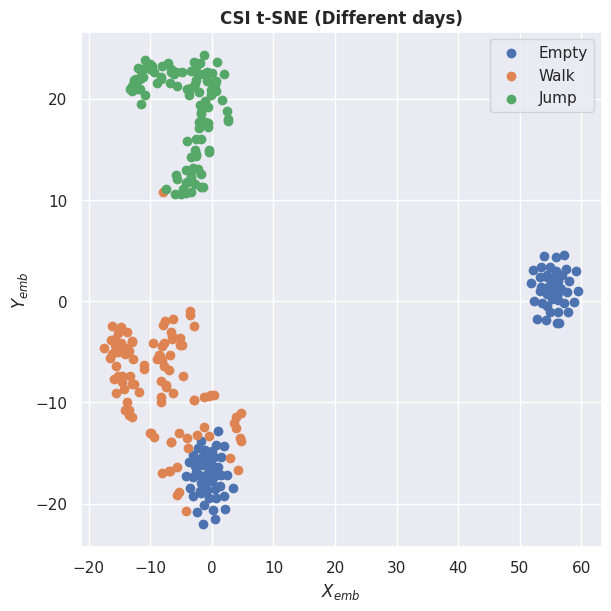

In [4]:
mat = scipy.io.loadmat("../dataset/rCSI-100")

X = mat["csi"].T
nsamples = mat["nsamples"].flatten()
dim = mat["dim"].flatten()
classnames = list(map(lambda s: s.strip().title(), mat["classnames"]))
y = []
for i in range(len(classnames)):
    y += [i] * nsamples[i]

Xstd = StandardScaler().fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=20,
    n_iter=5000,
    n_iter_without_progress=300,
    random_state=3,
    n_jobs=-1,
)

X_embedded = tsne.fit_transform(Xstd)

print(f"t-SNE converged in {tsne.n_iter_} iterations")

plt.figure(figsize=(6, 6), constrained_layout=True)

for i in range(len(classnames)):
    plt.scatter(
        X_embedded[np.sum(nsamples[:i]) : np.sum(nsamples[: i + 1]), 0],
        X_embedded[np.sum(nsamples[:i]) : np.sum(nsamples[: i + 1]), 1],
        label=classnames[i],
    )

plt.xlabel(r"$X_{emb}$")
plt.ylabel(r"$Y_{emb}$")
plt.legend()
plt.title("CSI t-SNE (Different days)", fontweight="bold")
plt.show()